In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2,n_classes=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [8]:
len(x)

10000

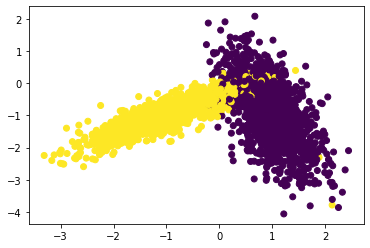

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [34]:
def RandomSearchCV(x_train,y_train,classifier,folds):

    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    params = sorted(random.sample(range(1,50),10))
    print(params)
    trainscores = []
    testscores = []
    #2.divide numbers ranging from  0 to len(X_train) into groups= folds
    x_train_split = []
    y_train_split = []

   #Here are splitting X_train into 3 folds 7500 points in total: 2500 points per batch  for the batch of 3
    for i in range(0, len(x_train), int(len(x_train)/folds)):
        x_train_split.append(x_train[i:i+int(len(x_train)/folds)])
        y_train_split.append(y_train[i:i+int(len(y_train)/folds)])
    
   #3.for each hyperparameter that we generated in step 1:
    for k in params:
        trainscores_folds = []
        testscores_folds  = []

        for g in range(len(x_train_split)):
          x_train_batch = np.concatenate(x_train_split[0:g] + x_train_split[g+1:])
          x_cv_batch = x_train_split[g]
          y_train_batch = np.concatenate(y_train_split[0:g] + y_train_split[g+1:])
          y_cv_batch = y_train_split[g]
          #KNN Train and Fit
          classifier.n_neighbors = k
          classifier.fit(x_train_batch, y_train_batch)

          #Predicton
          y_predicted = classifier.predict(x_cv_batch)
          testscores_folds.append(accuracy_score(y_cv_batch, y_predicted))

          y_predicted = classifier.predict(x_train_batch)
          trainscores_folds.append(accuracy_score(y_train_batch, y_predicted))

        
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))

    return params, trainscores, testscores
        
  

[2, 13, 24, 27, 28, 29, 32, 33, 34, 40]
Train Scores:[0.9684666666666666, 0.9580666666666667, 0.957, 0.9575999999999999, 0.9573333333333333, 0.9577333333333332, 0.9575999999999999, 0.9575999999999999, 0.9577999999999999, 0.9574666666666666]
Test Scores: [0.9410666666666666, 0.9554666666666667, 0.9561333333333333, 0.956, 0.9558666666666666, 0.9562666666666667, 0.9556, 0.956, 0.9564, 0.9565333333333333]
Random Pramaeters: [2, 13, 24, 27, 28, 29, 32, 33, 34, 40]


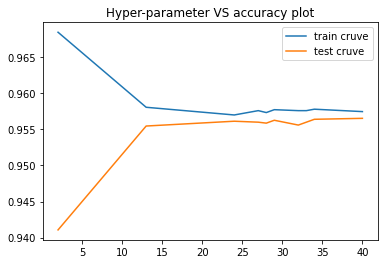

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

folds = 3

params,trainscores,testscores = RandomSearchCV(X_train, y_train, neigh,folds)

print(f"Train Scores:{trainscores}")
print(f"Test Scores: {testscores}")
print(f"Random Pramaeters: {params}")
plt.plot(params, trainscores, label='train cruve')
plt.plot(params, testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [18]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

**Inference from the Decision Boundary: **


*   From the decision boundary we can clearly see that when k=20  blue points are on edge on the left side of the graph, where as when k = 11 points are more clearly classified



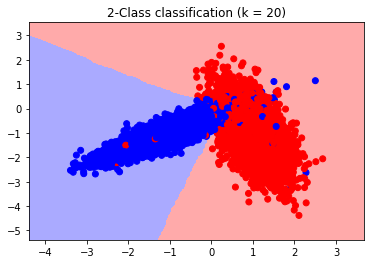

In [36]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

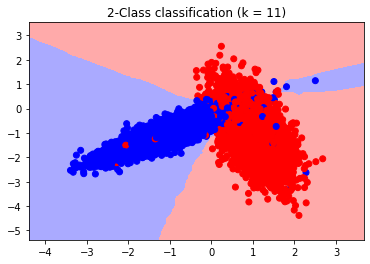

In [37]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 11)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

References Taken for this assignment from : 
machinelearningmastery.com
and the given reference notebooks